In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Note: Profesor no particiona los datos en validacion, no hace tecnicas de holdount

# Transformacion variables para conseguir una relacion no lineal

- La variable a predecir no necesariamente tiene una relacion lineal con las variables predictoras
- Pueden haber relaciones no lineales
- Recomendar hacer un plot con las variables predictores
-

In [186]:
data = pd.read_csv('https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/auto/auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


- Hago los cambios siguiendo las instrucciones del instructor, sin una posicion critica, o proponer una mejor manera, con la finalidad de obtener los mismos resultados a la hora de seguir el curso. Lo mas importante es entender el **concepto**

In [187]:
data['mpg'] = data['mpg'].dropna()
data['horsepower'] = data['horsepower'].dropna()

Text(0.5, 1.0, 'CV vs MPG')

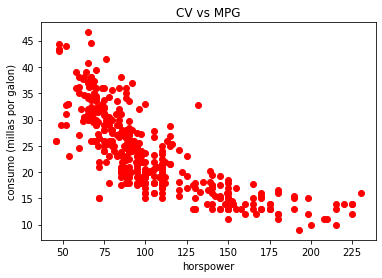

In [188]:
# La distribucion de los datos, parece tener una forma exponencial o cuadratica en forma de parabola
plt.plot(data["horsepower"], data["mpg"], 'ro')
plt.xlabel("horspower")
plt.ylabel("consumo (millas por galon)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
mpg = w0+w1horsepower

In [189]:
X = data['horsepower'].fillna(data['horsepower'].mean())
y = data['mpg'].fillna(data['mpg'].mean())

In [190]:
type(X)

pandas.core.series.Series

In [191]:
X = np.array(X)
X_data = X[:, np.newaxis]

In [192]:
lm = LinearRegression()

lm.fit(X_data,y)

LinearRegression()

In [193]:
type(X)

numpy.ndarray

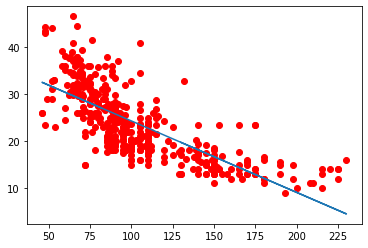

In [194]:
plt.plot(X,y,"ro")
plt.plot(X, lm.predict(X_data))

- Parece que la linea se ajusta medianamente a los datos

In [195]:
R2 = lm.score(X_data,y)
R2

0.5746533406450252

In [196]:
#Suma de los cuadrados de las desviaciones
SSD = np.sum((y - lm.predict(X_data))**2)
#Factor RSE
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean = np.mean(y)
error = RSE/y_mean

In [197]:
SSD, RSE, y_mean, error*100

(10315.751960060918, 4.940471238582747, 23.514572864321607, 21.01025294862518)

### Modelo de regresion cuadratico
- **mpg = w0+w1horsepower^2**

In [198]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [199]:
lm = LinearRegression()
lm.fit(X_data, y)

LinearRegression()

In [200]:
# Empeoro
lm.score(X_data,y)

0.4849887034823205

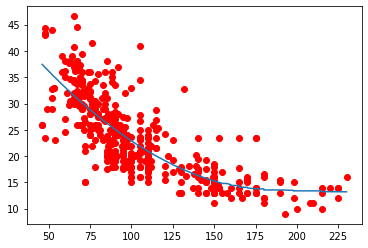

In [218]:
plt.plot(X,y,"ro")
plt.plot(sorted(X,reverse=True), sorted(lm.predict(X_data)))

In [202]:
#Suma de los cuadrados de las desviaciones
SSD = np.sum((y - lm.predict(X_data))**2)
#Factor RSE
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean = np.mean(y)
error = RSE/y_mean

In [203]:
# El error aumento, el 23.20125% no pudo ser explicado por el modelo
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.455676832957554, 23.514572864321607, 23.201258489519024)

### Modelo de regresión lineal y cuadratico
- **mpg = a + b * horsepower + c * horsepower^2**

In [204]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [205]:
# Usaremos un polinomio de grado dos
# Instancia estimador
poly = PolynomialFeatures(degree = 2)

In [206]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [207]:
lm = linear_model.LinearRegression()
lm.fit(X_data, y)

LinearRegression()

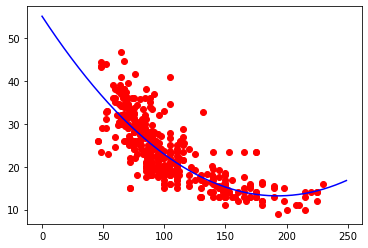

In [208]:
plt.plot(X,y,"ro")
x_show = pd.DataFrame({'A':range(0,250)})
x_show_py = poly.fit_transform(x_show)
plt.plot(x_show, lm.predict(x_show_py), color="b")

In [209]:
#Modelo mejoro
lm.score(X_data, y)

0.6439066584257469

In [210]:
lm.intercept_

55.026192447081144

In [211]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026192447081144 -0.43404318 * hp + 0.00112615 * hp^2

In [227]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,y)
    print("Regresion de grado "+str(i))
    print(lm.score(X_data,y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, y, lm.predict(X_data))

Regresion de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, y_mean: 23.514572864321607, error: 19.6379546619069%
Regresion de grado 3
0.6444678885560744
58.448774111485776
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, y_mean: 23.514572864321607, error: 19.622473106036686%
Regresion de grado 4
0.6467674189704502
40.09664386277885
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, y_mean: 23.514572864321607, error: 19.55891250126879%
Regresion de grado 5
0.6547512491363356
-40.694029037178666
[ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388794579, RSE: 4.546921734127706, y_mean: 23.514572864321607, error: 19.336612067602974%


In [223]:
def regresion_validation(X_data, y, y_pred):
    SSD = np.sum((y-y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+ ", y_mean: "+str(y_mean)+ ", error: "+str(error*100)+"%")